# BatFlightAnalysis

## Paquetes

In [33]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy.stats import wilcoxon

from BatFlightAnalysis import read_data, split_data

In [34]:
import warnings

warnings.filterwarnings("ignore")

## Funciones

In [35]:
def curvatura(df):
    # Convertir a arrays de numpy
    x = np.array(df['x'])
    y = np.array(df['y'])
    z = np.array(df['z'])

    # Calcular las derivadas usando diferencias finitas
    dx = np.gradient(x)
    dy = np.gradient(y)
    dz = np.gradient(z)

    ddx = np.gradient(dx)
    ddy = np.gradient(dy)
    ddz = np.gradient(dz)

    # Calcular la curvatura
    curvatura = np.zeros(len(x))

    for i in range(len(x)):
        # Vectores de la primera y segunda derivada
        r_prime = np.array([dx[i], dy[i], dz[i]])
        r_double_prime = np.array([ddx[i], ddy[i], ddz[i]])
        
        # Producto cruzado de r' y r''
        cross_product = np.cross(r_prime, r_double_prime)
        
        # Magnitud de r'
        norm_r_prime = np.linalg.norm(r_prime)
        
        # Curvatura
        curvatura[i] = np.linalg.norm(cross_product) / (norm_r_prime**3)

    # Desviación Estándar de la curvatura
    std_curvatura = np.std(curvatura)

    # Media de la curvatura
    mean_curvatura = np.mean(curvatura)

    # Integral de la curvatura
    integral_curvatura = np.trapz(curvatura)

    return mean_curvatura, std_curvatura, integral_curvatura

In [36]:
def longitud(df):
    # Convertir a arrays de numpy
    x = np.array(df['x'])
    y = np.array(df['y'])
    z = np.array(df['z'])

    # Longitud de la trayectoria
    longitud = np.zeros(len(x))

    for i in range(1, len(x)):
        longitud[i] = longitud[i-1] + np.sqrt((x[i] - x[i-1])**2 + (y[i] - y[i-1])**2 + (z[i] - z[i-1])**2)

    # Longitud total
    longitud_total = longitud[-1]

    return longitud_total

In [37]:
def var_espacial(df):
    # Convertir a arrays de numpy
    x = np.array(df['x'])
    y = np.array(df['y'])
    z = np.array(df['z'])

    longitud_x = np.max(x) - np.min(x)
    longitud_y = np.max(y) - np.min(y)
    longitud_z = np.max(z) - np.min(z)

    volumen = longitud_x * longitud_y * longitud_z

    return longitud_x, longitud_y, longitud_z, volumen


In [38]:
def hist_plots(whiskers_data, no_whiskers_data, metric):
    print(f"Normality test for {metric}:")
    # Perform normality check for "whiskers" and "no whiskers" groups and plot histograms
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histogram for 'whiskers'
    axes[0].hist(whiskers_data[metric], bins=15, edgecolor='black', alpha=0.7)
    axes[0].set_title(f'Histogram of {metric} (Whiskers)')


    # Histogram for 'no whiskers'
    axes[1].hist(no_whiskers_data[metric], bins=15, edgecolor='black', alpha=0.7)
    axes[1].set_title(f'Histogram of {metric} (No Whiskers)')

    plt.tight_layout()
    plt.show()

## Código

### Lectura de datos

In [39]:
data_bef, data_fee, data_aft = read_data('data/output_points_1_no_whiskers.xlsx')

In [40]:
# Split data into flower and bat data; before, during, and after feeding
flower_bef, flower_fee, flower_aft, bat_bef, bat_fee, bat_aft = split_data(data_bef, data_fee, data_aft)

# Show the data
print(flower_fee.head())

      x    y      z
9   281   94  349.0
10  283   98  345.0
11  283  100  341.0
12  283  103  338.0
13  288  103  336.0


### Curvatura

In [41]:
mean_curvatura, std_curvatura, int_curvatura = curvatura(flower_fee)
print('Desviación Estándar de la Curvatura:', std_curvatura)
print('Media de la Curvatura:', mean_curvatura)
print('Integral de la Curvatura:', int_curvatura)

Desviación Estándar de la Curvatura: 1.8368621915524173
Media de la Curvatura: 0.5475373323457154
Integral de la Curvatura: 43.19156036642262


### Longitud

In [42]:
# Longitud total
longitud_total = longitud(flower_fee)
print('Longitud Total:', longitud_total)

Longitud Total: 375.82886152263075


### Variación en cada eje

In [43]:
# Variación en cada eje
longitud_x, longitud_y, longitud_z, volumen = var_espacial(flower_fee)

print('Longitud de la trayectoria en el eje x:', longitud_x)
print('Longitud de la trayectoria en el eje y:', longitud_y)
print('Longitud de la trayectoria en el eje z:', longitud_z)
print('Volumen del Espacio:', volumen)

Longitud de la trayectoria en el eje x: 14
Longitud de la trayectoria en el eje y: 15
Longitud de la trayectoria en el eje z: 17.0
Volumen del Espacio: 3570.0


## Iteración sobre archivos

In [44]:
individuo, whiskers, n_vuelo = [], [], []
mean_curvatura, std_curvatura, int_curvatura = [], [], []
longitud_total = []
longitud_x, longitud_y, longitud_z, volumen = [], [], [], []

for n in range(6,10):
    # for tipo in ["Whiskers"]:
    for tipo in ["Whiskers", "No whiskers"]:
        # Recorro lo archivos de la capeta Individuo n
        for file in os.listdir(f'data/Individuo {n}/{tipo}'):
            # print("Procesando:", f"Individuo {n}/{tipo}/{file}")

            try:
                data_bef, data_fee, data_aft = read_data(f'data/Individuo {n}/{tipo}/{file}')

                # Split data into flower and bat data; before, during, and after feeding
                flower_bef, flower_fee, flower_aft, bat_bef, bat_fee, bat_aft = split_data(data_bef, data_fee, data_aft)

                # Curvatura
                mean_curv, std_curv, int_curv = curvatura(flower_fee)
                mean_curvatura.append(mean_curv)
                std_curvatura.append(std_curv)
                int_curvatura.append(int_curv)

                # Longitud total
                long = longitud(flower_fee)
                longitud_total.append(long)

                # Variación en cada eje
                long_x, long_y, long_z, vol = var_espacial(flower_fee)
                longitud_x.append(long_x)
                longitud_y.append(long_y)
                longitud_z.append(long_z)
                volumen.append(vol)

                individuo.append(n)
                whiskers.append(tipo)
                n_vuelo.append(file.split('_')[-1].split('.')[0])
            except:
                print("Error en el archivo:", f"Individuo {n}/{tipo}/{file}")

# Creo el conjunto de datos
df = pd.DataFrame({
    'Individuo': individuo,
    'Tipo': whiskers,
    'No. Vuelo': n_vuelo,
    'Curvatura Media': mean_curvatura,
    'Desviación Estándar de la Curvatura': std_curvatura,
    'Integral de la Curvatura': int_curvatura,
    'Longitud Total': longitud_total,
    'Longitud en X': longitud_x,
    'Longitud en Y': longitud_y,
    'Longitud en Z': longitud_z,
    'Volumen': volumen
})

# Muestro los datos
display(df.head())

Error en el archivo: Individuo 6/No whiskers/output_points_7.xlsx


,Individuo,Tipo,No. Vuelo,Curvatura Media,Desviación Estándar de la Curvatura,Integral de la Curvatura,Longitud Total,Longitud en X,Longitud en Y,Longitud en Z,Volumen
0,6,Whiskers,1,0.319137,0.309382,5.333128,75.694841,18.0,14.0,19.0,4788.0
1,6,Whiskers,10,0.061655,0.072966,1.756422,260.010676,54.0,40.0,125.0,270000.0
2,6,Whiskers,11,1.097282,3.454947,19.665025,80.997540,7.0,21.0,18.0,2646.0
3,6,Whiskers,12,0.128108,0.231968,2.129493,131.251894,21.0,40.0,93.0,78120.0
4,6,Whiskers,13,0.255117,0.302641,3.785561,58.087628,10.0,11.0,16.0,1760.0


In [45]:
# Guardo los datos
df.to_excel('data/mediciones.xlsx', index=False)

## Análisis comparativo

In [46]:
# Leo el archivo de datos
data = pd.read_excel('data/mediciones.xlsx')

display(data.head())

,Individuo,Tipo,No. Vuelo,Curvatura Media,Desviación Estándar de la Curvatura,Integral de la Curvatura,Longitud Total,Longitud en X,Longitud en Y,Longitud en Z,Volumen
0,6,Whiskers,1,0.319137,0.309382,5.333128,75.694841,18,14,19.0,4788.0
1,6,Whiskers,10,0.061655,0.072966,1.756422,260.010676,54,40,125.0,270000.0
2,6,Whiskers,11,1.097282,3.454947,19.665025,80.997540,7,21,18.0,2646.0
3,6,Whiskers,12,0.128108,0.231968,2.129493,131.251894,21,40,93.0,78120.0
4,6,Whiskers,13,0.255117,0.302641,3.785561,58.087628,10,11,16.0,1760.0


In [47]:
metrics = ['Curvatura Media', 'Desviación Estándar de la Curvatura', 'Integral de la Curvatura', 'Longitud Total', 'Longitud en X', 'Longitud en Y', 'Longitud en Z', 'Volumen']

data.columns = data.columns.str.replace(" ", "_")
metrics = [metric.replace(" ", "_") for metric in metrics]

Normality test for Curvatura_Media:


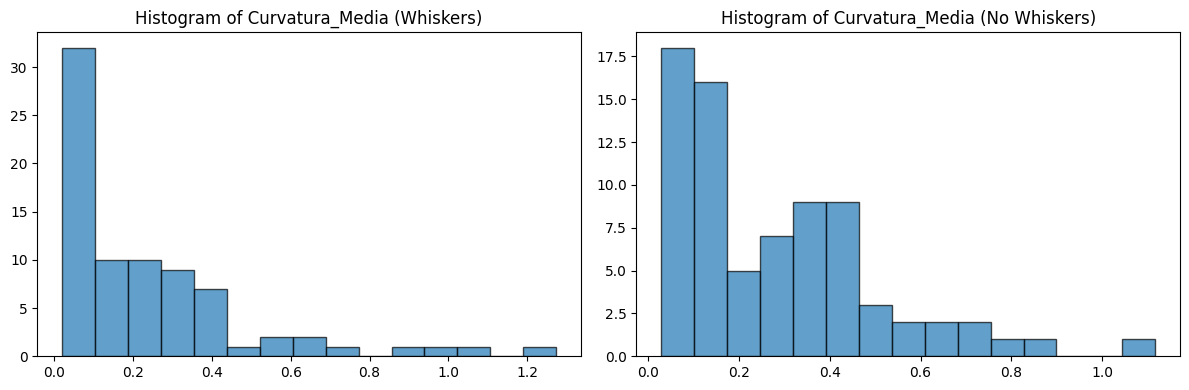

Normality test for Desviación_Estándar_de_la_Curvatura:


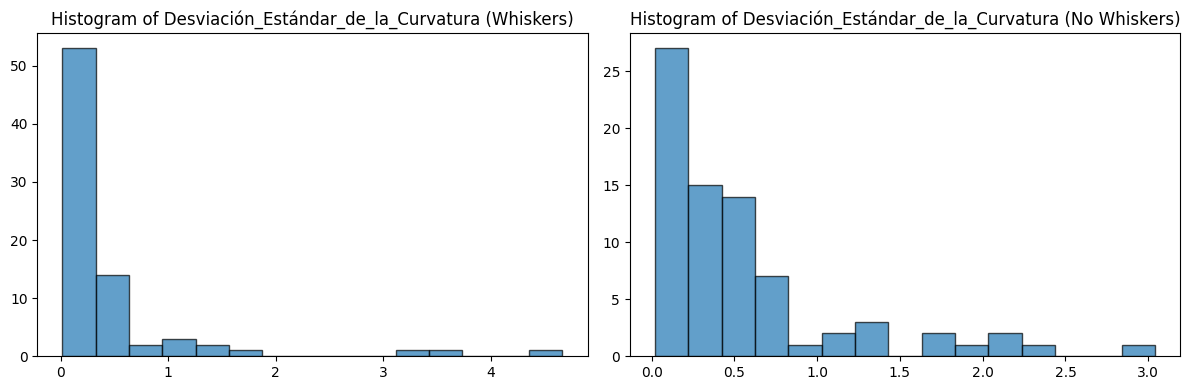

Normality test for Integral_de_la_Curvatura:


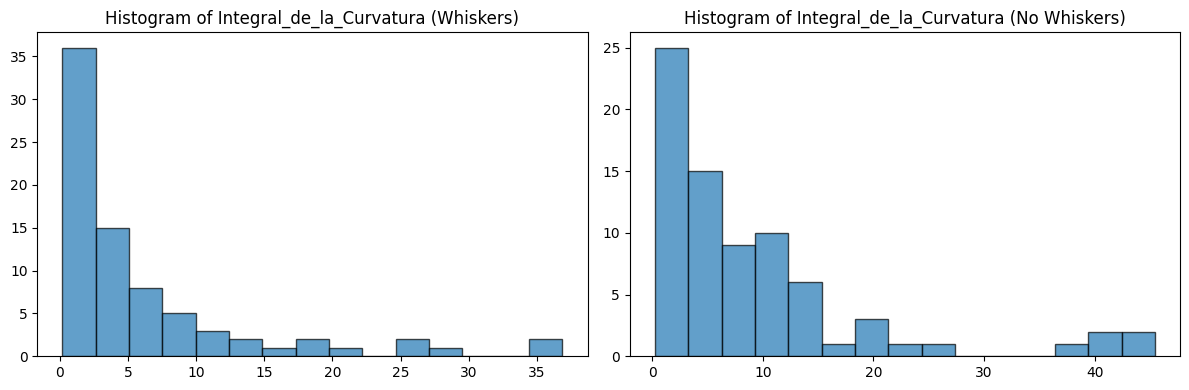

Normality test for Longitud_Total:


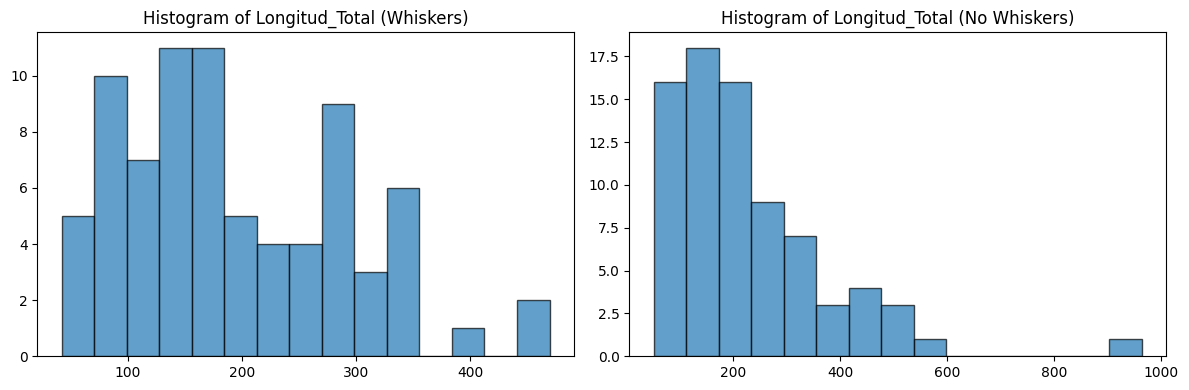

Normality test for Longitud_en_X:


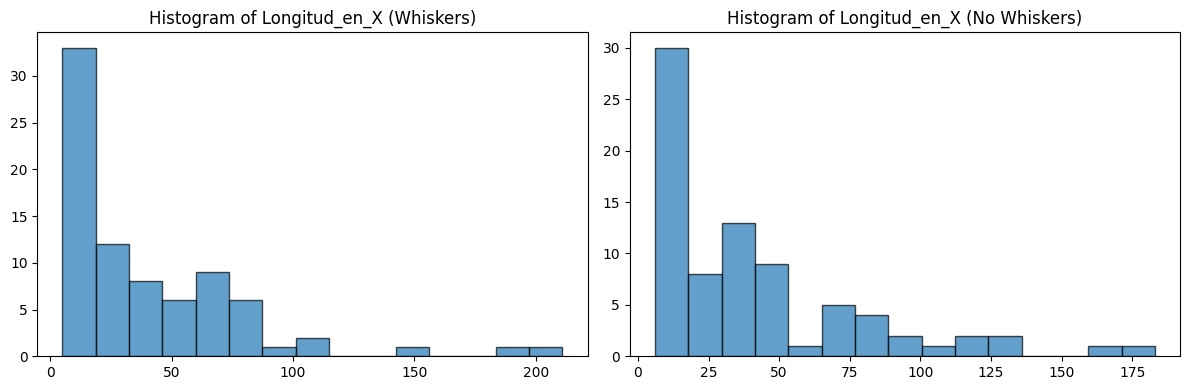

Normality test for Longitud_en_Y:


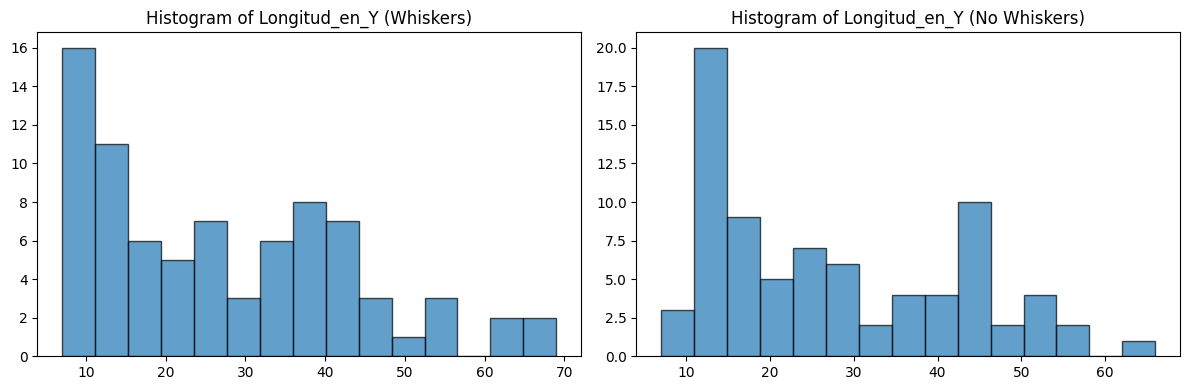

Normality test for Longitud_en_Z:


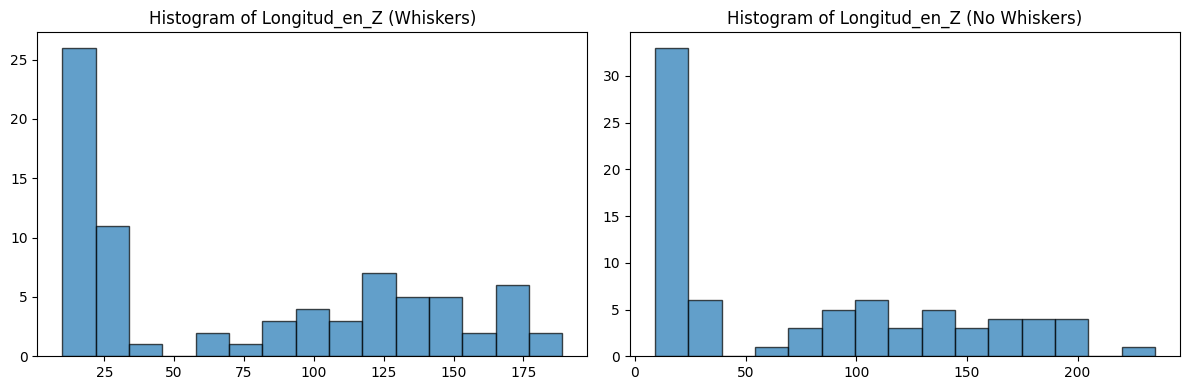

Normality test for Volumen:


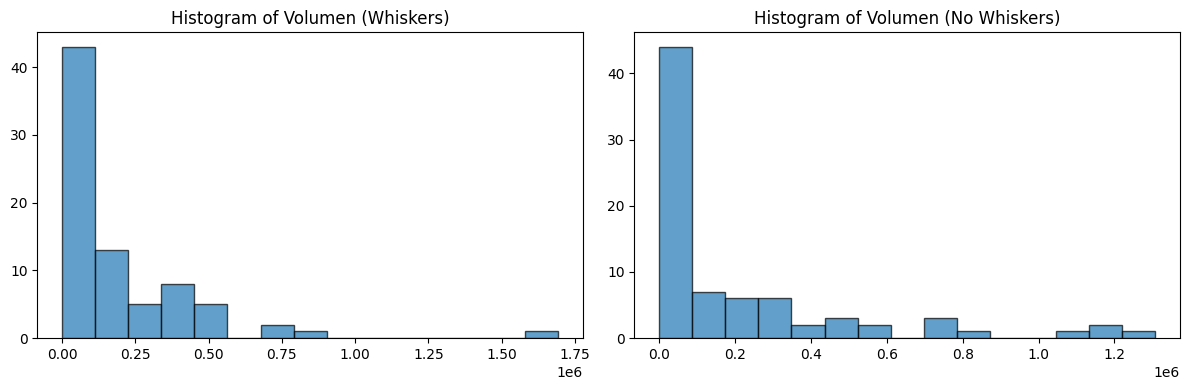

In [48]:
# Separate data based on "Tipo" (whiskers or no whiskers)
whiskers_data = data[data['Tipo'] == 'Whiskers']
no_whiskers_data = data[data['Tipo'] == 'No whiskers']

for metric in metrics:
    hist_plots(whiskers_data, no_whiskers_data, metric)

Modelo lineal mixto

In [49]:
for metric in metrics:
    print(f"Modelo lineal mixto para {metric}:")

    cleaned_data = data.dropna(subset=[metric, "Tipo"])

    # Re-attempt fitting the linear mixed effects model
    model = smf.mixedlm(f"{metric} ~ Tipo", cleaned_data, groups=cleaned_data["Individuo"])
    result = model.fit()

    # Summarize the results of the mixed effects model
    display(result.summary())

Modelo lineal mixto para Curvatura_Media:


<class 'statsmodels.iolib.summary2.Summary'>
"""
            Mixed Linear Model Regression Results
=============================================================
Model:            MixedLM Dependent Variable: Curvatura_Media
No. Observations: 154     Method:             REML           
No. Groups:       4       Scale:              0.0570         
Min. group size:  37      Log-Likelihood:     -3.2575        
Max. group size:  41      Converged:          Yes            
Mean group size:  38.5                                       
-------------------------------------------------------------
                   Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept           0.282    0.033  8.619 0.000  0.218  0.347
Tipo[T.Whiskers]   -0.044    0.038 -1.152 0.249 -0.120  0.031
Group Var           0.001    0.009                           
=============================================================

"""

Modelo lineal mixto para Desviación_Estándar_de_la_Curvatura:


<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Mixed Linear Model Regression Results
=================================================================================
Model:            MixedLM Dependent Variable: Desviación_Estándar_de_la_Curvatura
No. Observations: 154     Method:             REML                               
No. Groups:       4       Scale:              0.4617                             
Min. group size:  37      Log-Likelihood:     -163.1176                          
Max. group size:  41      Converged:          Yes                                
Mean group size:  38.5                                                           
-------------------------------------------------------------------------------------
                       Coef.      Std.Err.       z        P>|z|     [0.025     0.975]
-------------------------------------------------------------------------------------
Intercept               0.567        0.115      4.916     0.000      0.341      0.792
Tipo[T.Whiskers]       -0.117        0.110     -1.065     0.287     -0.331      0.098
Group Var               0.029        0.050                                           
=================================================================================

"""

Modelo lineal mixto para Integral_de_la_Curvatura:


<class 'statsmodels.iolib.summary2.Summary'>
"""
                Mixed Linear Model Regression Results
======================================================================
Model:            MixedLM Dependent Variable: Integral_de_la_Curvatura
No. Observations: 154     Method:             REML                    
No. Groups:       4       Scale:              82.3734                 
Min. group size:  37      Log-Likelihood:     -556.9793               
Max. group size:  41      Converged:          Yes                     
Mean group size:  38.5                                                
------------------------------------------------------------------------
                    Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
------------------------------------------------------------------------
Intercept            9.125      1.488    6.134   0.000    6.209   12.040
Tipo[T.Whiskers]    -2.977      1.463   -2.035   0.042   -5.845   -0.110
Group Var            4.514      0.609                                   
======================================================================

"""

Modelo lineal mixto para Longitud_Total:


<class 'statsmodels.iolib.summary2.Summary'>
"""
            Mixed Linear Model Regression Results
==============================================================
Model:              MixedLM Dependent Variable: Longitud_Total
No. Observations:   156     Method:             REML          
No. Groups:         4       Scale:              15484.3488    
Min. group size:    38      Log-Likelihood:     -967.2187     
Max. group size:    41      Converged:          Yes           
Mean group size:    39.0                                      
--------------------------------------------------------------
                  Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
--------------------------------------------------------------
Intercept        227.307   19.129 11.883 0.000 189.816 264.799
Tipo[T.Whiskers] -33.486   19.929 -1.680 0.093 -72.546   5.575
Group Var        669.314    7.081                             
==============================================================

"""

Modelo lineal mixto para Longitud_en_X:


<class 'statsmodels.iolib.summary2.Summary'>
"""
            Mixed Linear Model Regression Results
=============================================================
Model:              MixedLM Dependent Variable: Longitud_en_X
No. Observations:   159     Method:             REML         
No. Groups:         4       Scale:              1371.9517    
Min. group size:    38      Log-Likelihood:     -797.0472    
Max. group size:    42      Converged:          No           
Mean group size:    39.8                                     
-------------------------------------------------------------
                  Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-------------------------------------------------------------
Intercept         41.477    8.072  5.138 0.000  25.656 57.297
Tipo[T.Whiskers]  -0.973    5.875 -0.166 0.868 -12.488 10.542
Group Var        191.089    7.183                            
=============================================================

"""

Modelo lineal mixto para Longitud_en_Y:


<class 'statsmodels.iolib.summary2.Summary'>
"""
           Mixed Linear Model Regression Results
===========================================================
Model:            MixedLM Dependent Variable: Longitud_en_Y
No. Observations: 159     Method:             REML         
No. Groups:       4       Scale:              221.6112     
Min. group size:  38      Log-Likelihood:     -653.6088    
Max. group size:  42      Converged:          No           
Mean group size:  39.8                                     
-----------------------------------------------------------
                  Coef.  Std.Err.   z   P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept         27.395    2.955 9.269 0.000 21.602 33.188
Tipo[T.Whiskers]   0.259    2.361 0.110 0.913 -4.369  4.887
Group Var         23.711    1.430                          
===========================================================

"""

Modelo lineal mixto para Longitud_en_Z:


<class 'statsmodels.iolib.summary2.Summary'>
"""
           Mixed Linear Model Regression Results
============================================================
Model:             MixedLM Dependent Variable: Longitud_en_Z
No. Observations:  156     Method:             REML         
No. Groups:        4       Scale:              3929.8573    
Min. group size:   38      Log-Likelihood:     -861.1105    
Max. group size:   41      Converged:          Yes          
Mean group size:   39.0                                     
------------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
------------------------------------------------------------
Intercept        76.902    8.539  9.006 0.000  60.166 93.638
Tipo[T.Whiskers] -1.276   10.039 -0.127 0.899 -20.953 18.401
Group Var        90.087    3.127                            
============================================================

"""

Modelo lineal mixto para Volumen:


<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Mixed Linear Model Regression Results
=============================================================================
Model:                 MixedLM      Dependent Variable:      Volumen         
No. Observations:      156          Method:                  REML            
No. Groups:            4            Scale:                   81127558501.7978
Min. group size:       38           Log-Likelihood:          -2157.9727      
Max. group size:       41           Converged:               No              
Mean group size:       39.0                                                  
-----------------------------------------------------------------------------
                     Coef.       Std.Err.   z    P>|z|    [0.025     0.975]  
-----------------------------------------------------------------------------
Intercept            197605.764 38435.633  5.141 0.000  122273.308 272938.220
Tipo[T.Whiskers]     -20690.167 45616.658 -0.454 0.650 -110097.174  68716.840
Group Var        1747369904.723 11853.710                                    
=============================================================================

"""

Prueba no paramétrica de Wilcoxon

In [50]:
for metric in metrics:
    print(f"Wilcoxon para {metric}:")

    paired_data = cleaned_data.pivot_table(index="Individuo", columns="Tipo", values=metric)

    wilcoxon_test_result = wilcoxon(paired_data["Whiskers"], paired_data["No whiskers"])

    print(wilcoxon_test_result)

Wilcoxon para Curvatura_Media:
WilcoxonResult(statistic=3.0, pvalue=0.625)
Wilcoxon para Desviación_Estándar_de_la_Curvatura:
WilcoxonResult(statistic=2.0, pvalue=0.375)
Wilcoxon para Integral_de_la_Curvatura:
WilcoxonResult(statistic=0.0, pvalue=0.125)
Wilcoxon para Longitud_Total:
WilcoxonResult(statistic=1.0, pvalue=0.25)
Wilcoxon para Longitud_en_X:
WilcoxonResult(statistic=5.0, pvalue=1.0)
Wilcoxon para Longitud_en_Y:
WilcoxonResult(statistic=5.0, pvalue=1.0)
Wilcoxon para Longitud_en_Z:
WilcoxonResult(statistic=4.0, pvalue=0.875)
Wilcoxon para Volumen:
WilcoxonResult(statistic=1.0, pvalue=0.25)


## Análisis comparativo con pedicelo

In [51]:
# Leo el archivo de datos
data = pd.read_excel('data/mediciones.xlsx')

display(data.head())

,Individuo,Tipo,No. Vuelo,Curvatura Media,Desviación Estándar de la Curvatura,Integral de la Curvatura,Longitud Total,Longitud en X,Longitud en Y,Longitud en Z,Volumen
0,6,Whiskers,1,0.319137,0.309382,5.333128,75.694841,18,14,19.0,4788.0
1,6,Whiskers,10,0.061655,0.072966,1.756422,260.010676,54,40,125.0,270000.0
2,6,Whiskers,11,1.097282,3.454947,19.665025,80.997540,7,21,18.0,2646.0
3,6,Whiskers,12,0.128108,0.231968,2.129493,131.251894,21,40,93.0,78120.0
4,6,Whiskers,13,0.255117,0.302641,3.785561,58.087628,10,11,16.0,1760.0


In [52]:
metrics = ['Curvatura Media', 'Desviación Estándar de la Curvatura', 'Integral de la Curvatura', 'Longitud Total', 'Longitud en X', 'Longitud en Y', 'Longitud en Z', 'Volumen']

data.columns = data.columns.str.replace(" ", "_")
metrics = [metric.replace(" ", "_") for metric in metrics]

### Estable

Normality test for Curvatura_Media:


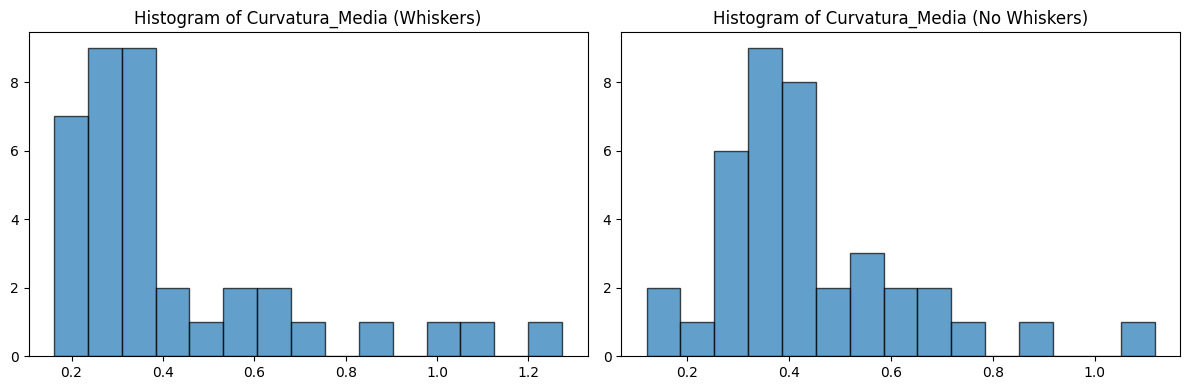

Normality test for Desviación_Estándar_de_la_Curvatura:


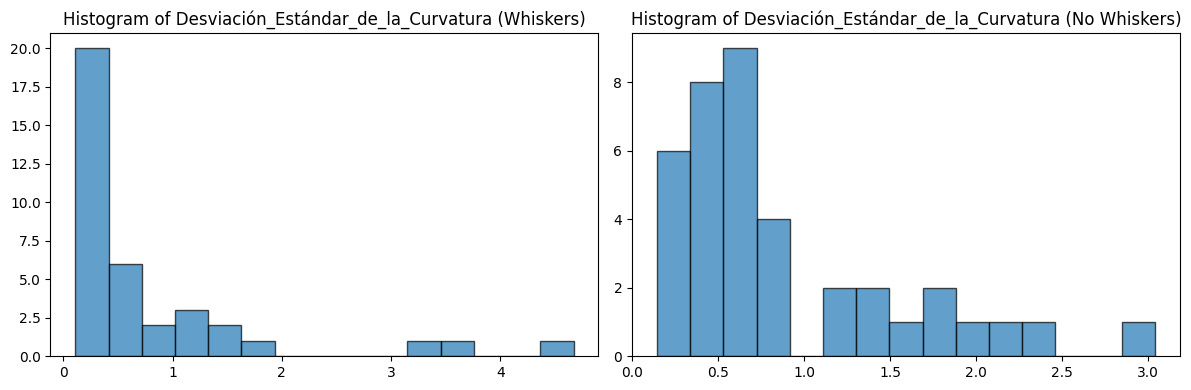

Normality test for Integral_de_la_Curvatura:


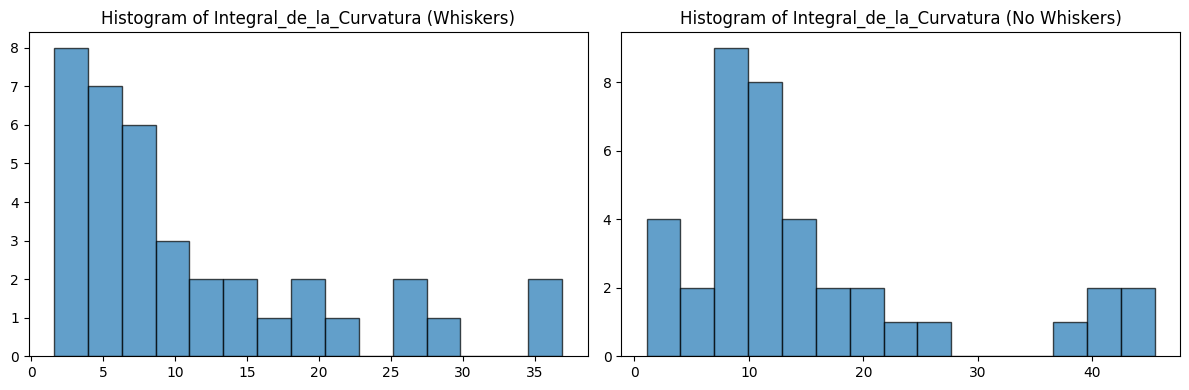

Normality test for Longitud_Total:


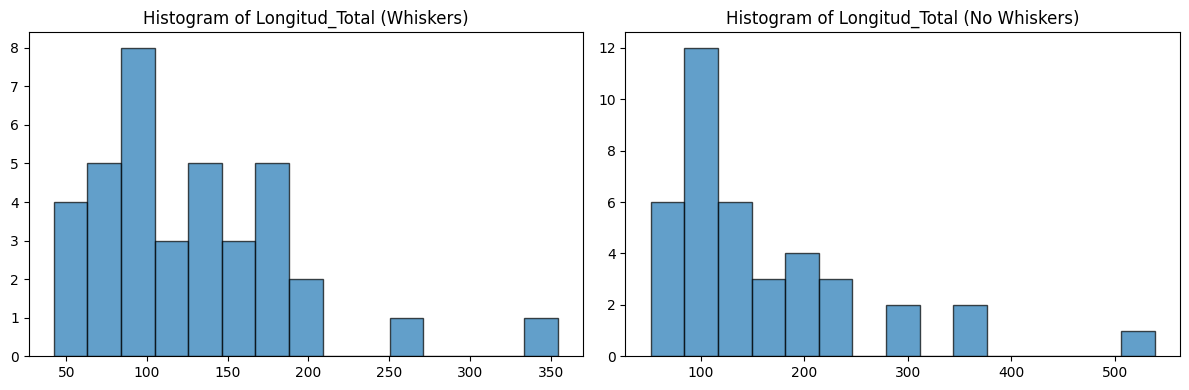

Normality test for Longitud_en_X:


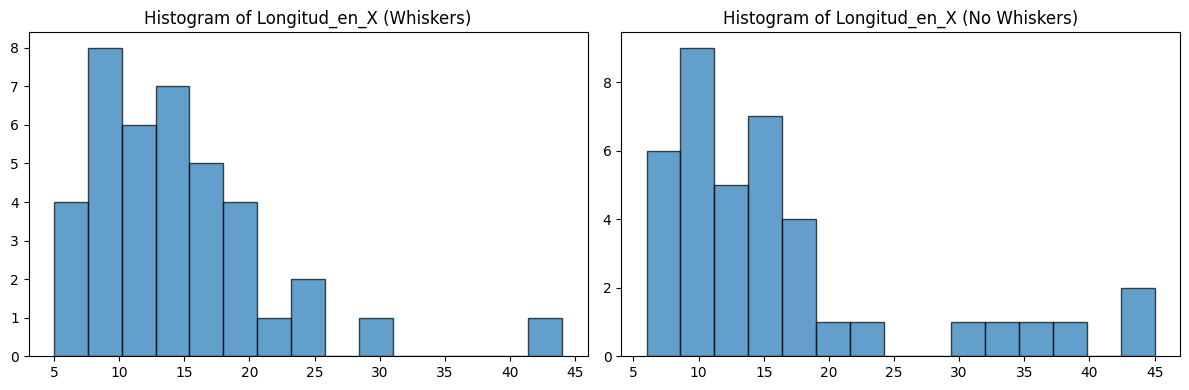

Normality test for Longitud_en_Y:


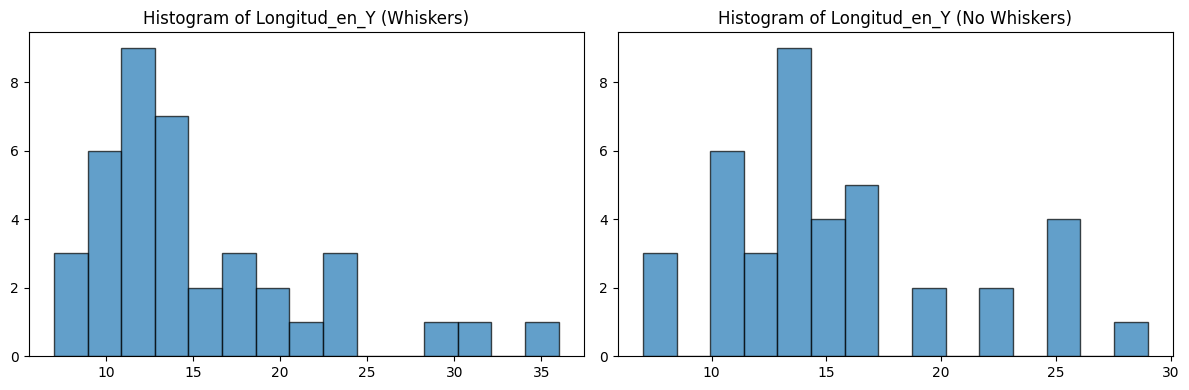

Normality test for Longitud_en_Z:


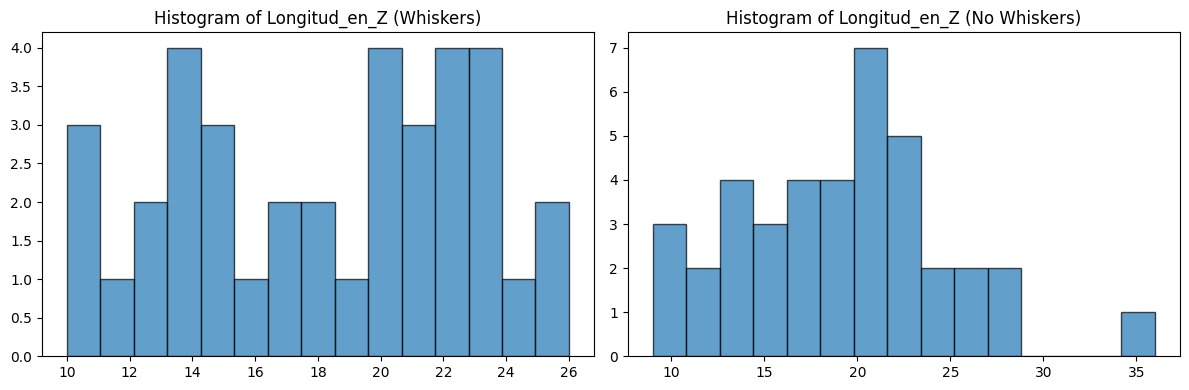

Normality test for Volumen:


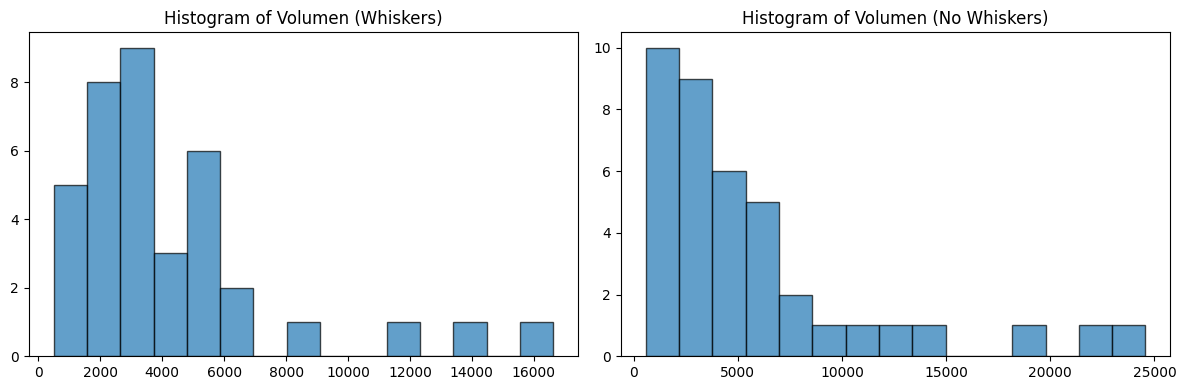

In [53]:
# Data estables, numéro de vuelo impares
data_estable = data[data['No._Vuelo'].astype(int) % 2 == 1]

# Separate data based on "Tipo" (whiskers or no whiskers)
whiskers_data = data_estable[data_estable['Tipo'] == 'Whiskers']
no_whiskers_data = data_estable[data_estable['Tipo'] == 'No whiskers']

for metric in metrics:
    hist_plots(whiskers_data, no_whiskers_data, metric)

In [58]:
for metric in metrics:
    print(f"Modelo lineal mixto para {metric}:")

    cleaned_data = data_estable.dropna(subset=[metric, "Tipo"])

    # Re-attempt fitting the linear mixed effects model
    model = smf.mixedlm(f"{metric} ~ Tipo", cleaned_data, groups=cleaned_data["Individuo"])
    result = model.fit()

    # Summarize the results of the mixed effects model
    display(result.summary())

Modelo lineal mixto para Curvatura_Media:


<class 'statsmodels.iolib.summary2.Summary'>
"""
            Mixed Linear Model Regression Results
=============================================================
Model:            MixedLM Dependent Variable: Curvatura_Media
No. Observations: 75      Method:             REML           
No. Groups:       4       Scale:              0.0516         
Min. group size:  18      Log-Likelihood:     -0.5880        
Max. group size:  21      Converged:          Yes            
Mean group size:  18.8                                       
-------------------------------------------------------------
                   Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept           0.447    0.051  8.723 0.000  0.346  0.547
Tipo[T.Whiskers]   -0.023    0.052 -0.445 0.656 -0.126  0.079
Group Var           0.005    0.029                           
=============================================================

"""

Modelo lineal mixto para Desviación_Estándar_de_la_Curvatura:


<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Mixed Linear Model Regression Results
=================================================================================
Model:            MixedLM Dependent Variable: Desviación_Estándar_de_la_Curvatura
No. Observations: 75      Method:             REML                               
No. Groups:       4       Scale:              0.6743                             
Min. group size:  18      Log-Likelihood:     -94.6716                           
Max. group size:  21      Converged:          Yes                                
Mean group size:  18.8                                                           
-------------------------------------------------------------------------------------
                       Coef.      Std.Err.       z        P>|z|     [0.025     0.975]
-------------------------------------------------------------------------------------
Intercept               0.886        0.199      4.446     0.000      0.496      1.277
Tipo[T.Whiskers]       -0.079        0.190     -0.416     0.678     -0.451      0.293
Group Var               0.088        0.127                                           
=================================================================================

"""

Modelo lineal mixto para Integral_de_la_Curvatura:


<class 'statsmodels.iolib.summary2.Summary'>
"""
                Mixed Linear Model Regression Results
======================================================================
Model:            MixedLM Dependent Variable: Integral_de_la_Curvatura
No. Observations: 75      Method:             REML                    
No. Groups:       4       Scale:              104.1398                
Min. group size:  18      Log-Likelihood:     -278.5086               
Max. group size:  21      Converged:          Yes                     
Mean group size:  18.8                                                
------------------------------------------------------------------------
                    Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
------------------------------------------------------------------------
Intercept           15.095      2.403    6.281   0.000   10.385   19.805
Tipo[T.Whiskers]    -4.038      2.357   -1.713   0.087   -8.658    0.582
Group Var           12.109      1.461                                   
======================================================================

"""

Modelo lineal mixto para Longitud_Total:


<class 'statsmodels.iolib.summary2.Summary'>
"""
            Mixed Linear Model Regression Results
==============================================================
Model:              MixedLM Dependent Variable: Longitud_Total
No. Observations:   76      Method:             REML          
No. Groups:         4       Scale:              6431.0519     
Min. group size:    18      Log-Likelihood:     -434.9764     
Max. group size:    21      Converged:          Yes           
Mean group size:    19.0                                      
--------------------------------------------------------------
                  Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
--------------------------------------------------------------
Intercept        159.421   19.476  8.186 0.000 121.249 197.593
Tipo[T.Whiskers] -32.251   18.409 -1.752 0.080 -68.333   3.831
Group Var        855.883   12.426                             
==============================================================

"""

Modelo lineal mixto para Longitud_en_X:


<class 'statsmodels.iolib.summary2.Summary'>
"""
           Mixed Linear Model Regression Results
===========================================================
Model:            MixedLM Dependent Variable: Longitud_en_X
No. Observations: 78      Method:             REML         
No. Groups:       4       Scale:              44.8244      
Min. group size:  18      Log-Likelihood:     -260.5545    
Max. group size:  21      Converged:          Yes          
Mean group size:  19.5                                     
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept        16.806    3.538  4.750 0.000  9.872 23.741
Tipo[T.Whiskers] -2.041    1.517 -1.345 0.178 -5.014  0.932
Group Var        45.460    5.958                           
===========================================================

"""

Modelo lineal mixto para Longitud_en_Y:


<class 'statsmodels.iolib.summary2.Summary'>
"""
           Mixed Linear Model Regression Results
===========================================================
Model:            MixedLM Dependent Variable: Longitud_en_Y
No. Observations: 78      Method:             REML         
No. Groups:       4       Scale:              27.3563      
Min. group size:  18      Log-Likelihood:     -240.8666    
Max. group size:  21      Converged:          Yes          
Mean group size:  19.5                                     
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept        15.704    2.071  7.582 0.000 11.644 19.763
Tipo[T.Whiskers] -0.448    1.185 -0.378 0.706 -2.770  1.875
Group Var        14.344    2.519                           
===========================================================

"""

Modelo lineal mixto para Longitud_en_Z:


<class 'statsmodels.iolib.summary2.Summary'>
"""
           Mixed Linear Model Regression Results
===========================================================
Model:            MixedLM Dependent Variable: Longitud_en_Z
No. Observations: 76      Method:             REML         
No. Groups:       4       Scale:              25.0515      
Min. group size:  18      Log-Likelihood:     -228.9013    
Max. group size:  21      Converged:          Yes          
Mean group size:  19.0                                     
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept        18.961    0.998 19.002 0.000 17.005 20.917
Tipo[T.Whiskers] -0.785    1.149 -0.683 0.495 -3.036  1.467
Group Var         1.408    0.462                           
===========================================================

"""

Modelo lineal mixto para Volumen:


<class 'statsmodels.iolib.summary2.Summary'>
"""
                Mixed Linear Model Regression Results
=====================================================================
Model:                MixedLM    Dependent Variable:    Volumen      
No. Observations:     76         Method:                REML         
No. Groups:           4          Scale:                 16163148.4069
Min. group size:      18         Log-Likelihood:        -726.5002    
Max. group size:      21         Converged:             Yes          
Mean group size:      19.0                                           
---------------------------------------------------------------------
                    Coef.    Std.Err.   z    P>|z|   [0.025   0.975] 
---------------------------------------------------------------------
Intercept           5906.737 1661.407  3.555 0.000  2650.438 9163.035
Tipo[T.Whiskers]   -1691.692  922.936 -1.833 0.067 -3500.613  117.229
Group Var        9377604.069 2127.946                                
=====================================================================

"""

### Flexible

Normality test for Curvatura_Media:


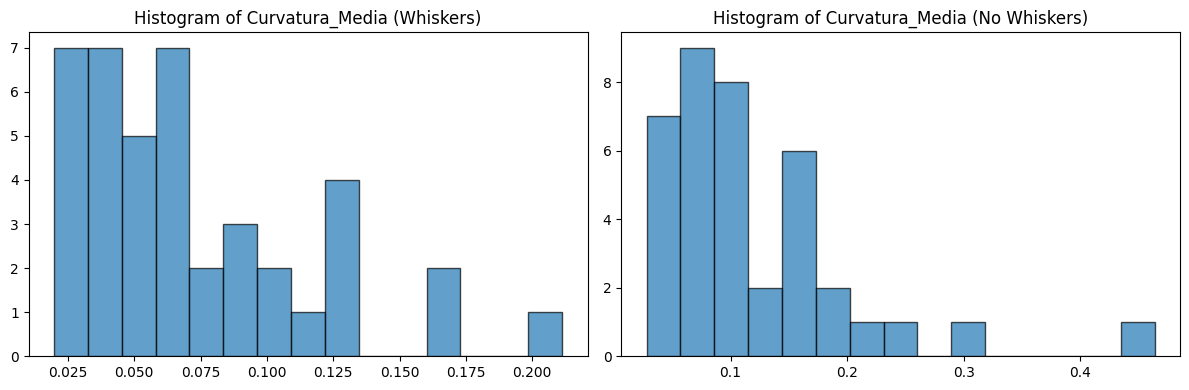

Normality test for Desviación_Estándar_de_la_Curvatura:


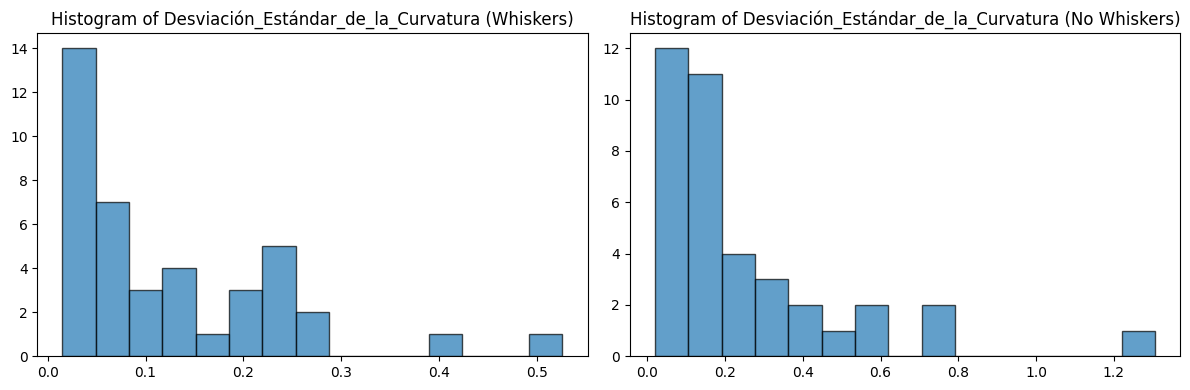

Normality test for Integral_de_la_Curvatura:


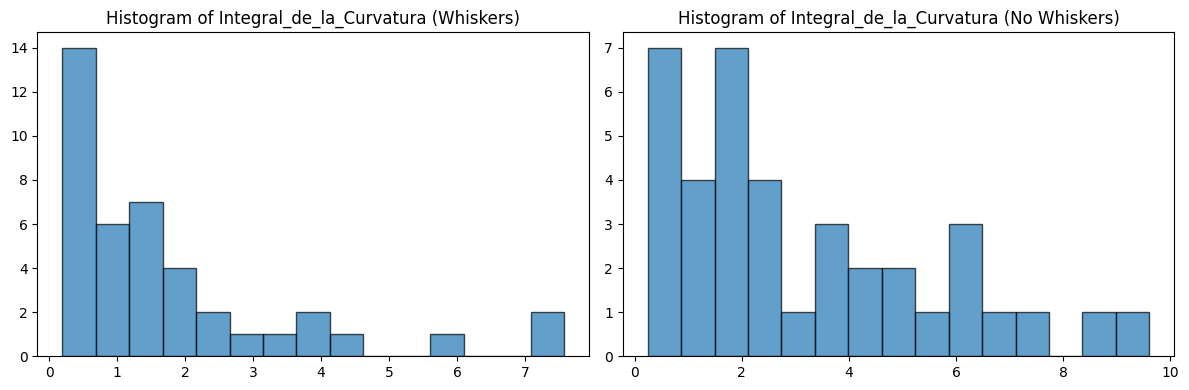

Normality test for Longitud_Total:


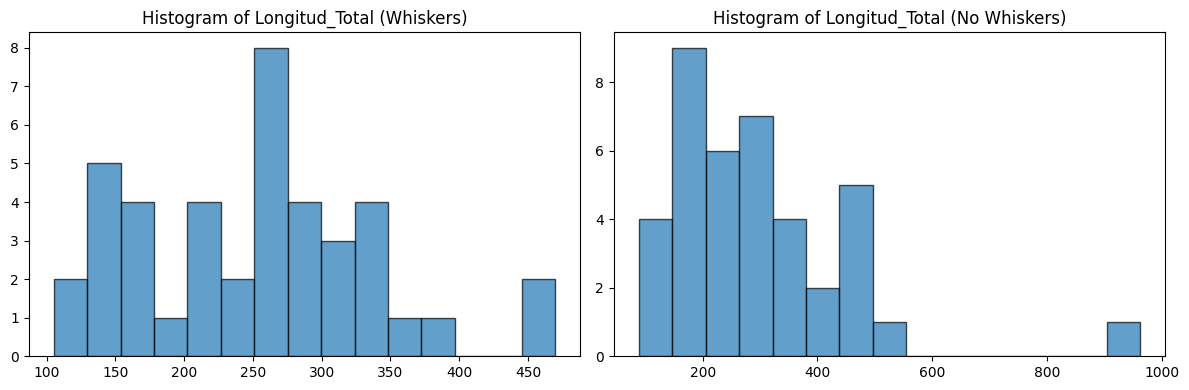

Normality test for Longitud_en_X:


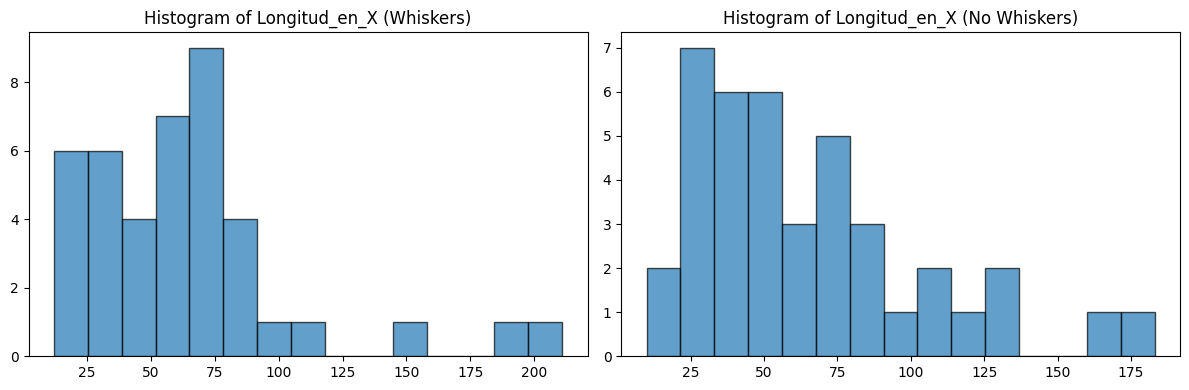

Normality test for Longitud_en_Y:


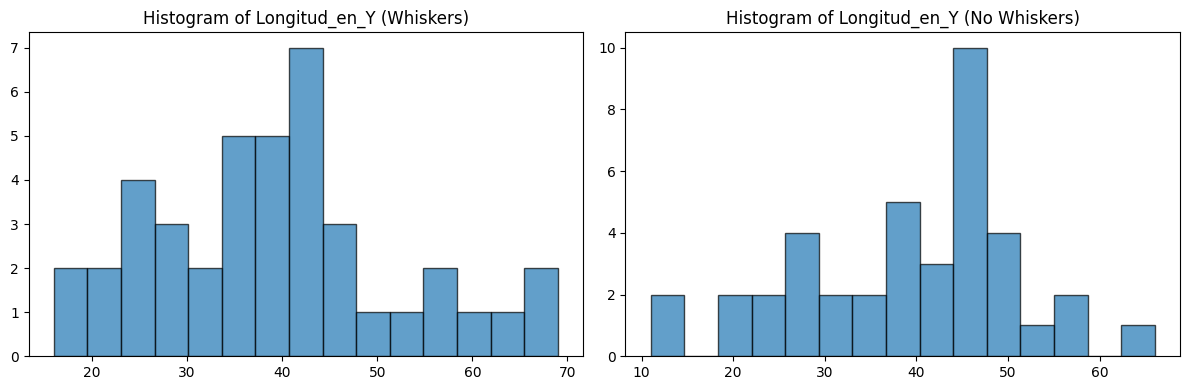

Normality test for Longitud_en_Z:


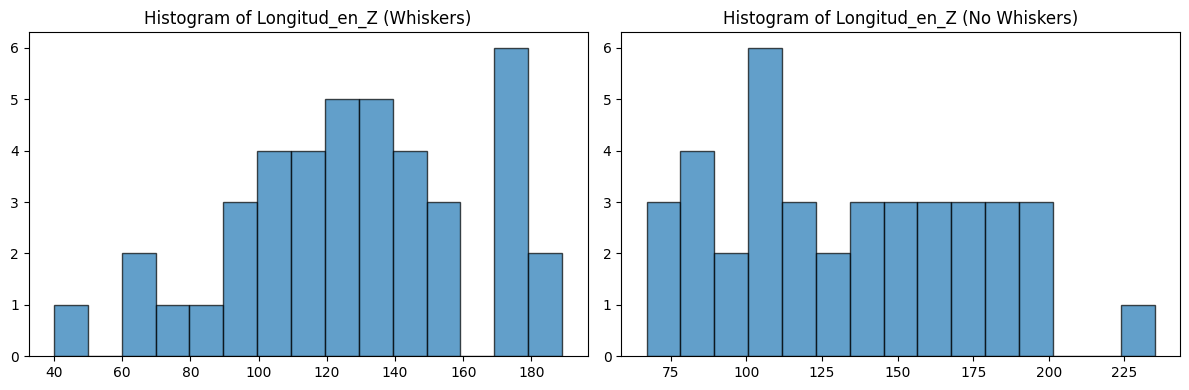

Normality test for Volumen:


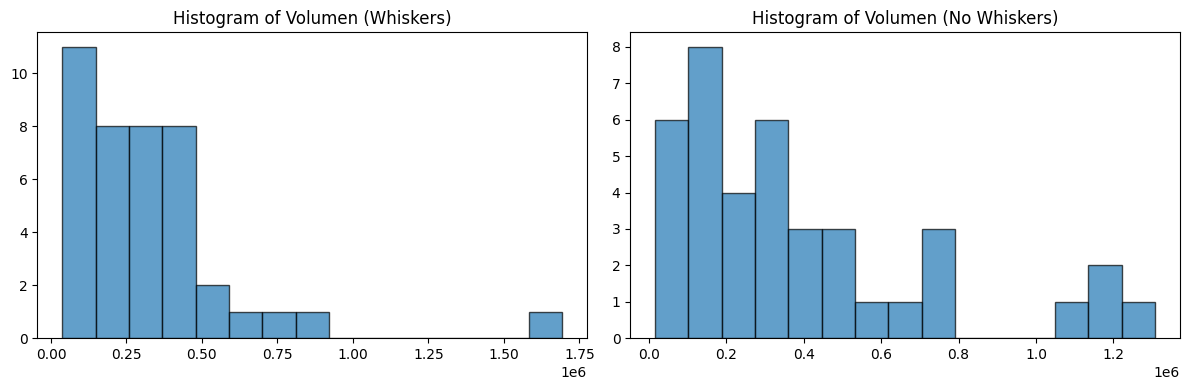

In [55]:
# Data estables, numéro de vuelo pares
data_flexible = data[data['No._Vuelo'].astype(int) % 2 == 0]

# Separate data based on "Tipo" (whiskers or no whiskers)
whiskers_data = data_flexible[data_flexible['Tipo'] == 'Whiskers']
no_whiskers_data = data_flexible[data_flexible['Tipo'] == 'No whiskers']

for metric in metrics:
    hist_plots(whiskers_data, no_whiskers_data, metric)

In [57]:
for metric in metrics:
    print(f"Modelo lineal mixto para {metric}:")

    cleaned_data = data_flexible.dropna(subset=[metric, "Tipo"])

    # Re-attempt fitting the linear mixed effects model
    model = smf.mixedlm(f"{metric} ~ Tipo", cleaned_data, groups=cleaned_data["Individuo"])
    result = model.fit()

    # Summarize the results of the mixed effects model
    display(result.summary())

Modelo lineal mixto para Curvatura_Media:


<class 'statsmodels.iolib.summary2.Summary'>
"""
            Mixed Linear Model Regression Results
=============================================================
Model:            MixedLM Dependent Variable: Curvatura_Media
No. Observations: 79      Method:             REML           
No. Groups:       4       Scale:              0.0040         
Min. group size:  19      Log-Likelihood:     97.6599        
Max. group size:  20      Converged:          Yes            
Mean group size:  19.8                                       
-------------------------------------------------------------
                   Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept           0.119    0.015  7.845 0.000  0.089  0.148
Tipo[T.Whiskers]   -0.047    0.014 -3.300 0.001 -0.075 -0.019
Group Var           0.000    0.009                           
=============================================================

"""

Modelo lineal mixto para Desviación_Estándar_de_la_Curvatura:


<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Mixed Linear Model Regression Results
=================================================================================
Model:            MixedLM Dependent Variable: Desviación_Estándar_de_la_Curvatura
No. Observations: 79      Method:             REML                               
No. Groups:       4       Scale:              0.0362                             
Min. group size:  19      Log-Likelihood:     13.2819                            
Max. group size:  20      Converged:          Yes                                
Mean group size:  19.8                                                           
-------------------------------------------------------------------------------------
                       Coef.      Std.Err.       z        P>|z|     [0.025     0.975]
-------------------------------------------------------------------------------------
Intercept               0.251        0.043      5.882     0.000      0.168      0.335
Tipo[T.Whiskers]       -0.123        0.043     -2.881     0.004     -0.207     -0.039
Group Var               0.003        0.023                                           
=================================================================================

"""

Modelo lineal mixto para Integral_de_la_Curvatura:


<class 'statsmodels.iolib.summary2.Summary'>
"""
                Mixed Linear Model Regression Results
======================================================================
Model:            MixedLM Dependent Variable: Integral_de_la_Curvatura
No. Observations: 79      Method:             REML                    
No. Groups:       4       Scale:              3.7730                  
Min. group size:  19      Log-Likelihood:     -166.9142               
Max. group size:  20      Converged:          Yes                     
Mean group size:  19.8                                                
------------------------------------------------------------------------
                    Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
------------------------------------------------------------------------
Intercept            3.154      0.611    5.166   0.000    1.957    4.351
Tipo[T.Whiskers]    -1.428      0.438   -3.261   0.001   -2.285   -0.570
Group Var            1.094      0.552                                   
======================================================================

"""

Modelo lineal mixto para Longitud_Total:


<class 'statsmodels.iolib.summary2.Summary'>
"""
            Mixed Linear Model Regression Results
==============================================================
Model:              MixedLM Dependent Variable: Longitud_Total
No. Observations:   80      Method:             REML          
No. Groups:         4       Scale:              16153.7271    
Min. group size:    20      Log-Likelihood:     -492.5057     
Max. group size:    20      Converged:          Yes           
Mean group size:    20.0                                      
--------------------------------------------------------------
                  Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
--------------------------------------------------------------
Intercept        294.870   21.174 13.926 0.000 253.371 336.369
Tipo[T.Whiskers] -40.954   28.434 -1.440 0.150 -96.684  14.775
Group Var        136.174    6.184                             
==============================================================

"""

Modelo lineal mixto para Longitud_en_X:


<class 'statsmodels.iolib.summary2.Summary'>
"""
            Mixed Linear Model Regression Results
=============================================================
Model:              MixedLM Dependent Variable: Longitud_en_X
No. Observations:   81      Method:             REML         
No. Groups:         4       Scale:              1433.3030    
Min. group size:    20      Log-Likelihood:     -405.1706    
Max. group size:    21      Converged:          Yes          
Mean group size:    20.2                                     
-------------------------------------------------------------
                  Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-------------------------------------------------------------
Intercept         65.325   10.001  6.532 0.000  45.723 84.927
Tipo[T.Whiskers]  -0.475    8.415 -0.056 0.955 -16.968 16.019
Group Var        256.777    7.222                            
=============================================================

"""

Modelo lineal mixto para Longitud_en_Y:


<class 'statsmodels.iolib.summary2.Summary'>
"""
           Mixed Linear Model Regression Results
===========================================================
Model:            MixedLM Dependent Variable: Longitud_en_Y
No. Observations: 81      Method:             REML         
No. Groups:       4       Scale:              121.9397     
Min. group size:  20      Log-Likelihood:     -308.8642    
Max. group size:  21      Converged:          Yes          
Mean group size:  20.2                                     
-----------------------------------------------------------
                  Coef.  Std.Err.   z   P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept         38.825    3.923 9.898 0.000 31.137 46.513
Tipo[T.Whiskers]   0.553    2.455 0.225 0.822 -4.258  5.364
Group Var         49.351    4.178                          
===========================================================

"""

Modelo lineal mixto para Longitud_en_Z:


<class 'statsmodels.iolib.summary2.Summary'>
"""
            Mixed Linear Model Regression Results
==============================================================
Model:             MixedLM  Dependent Variable:  Longitud_en_Z
No. Observations:  80       Method:              REML         
No. Groups:        4        Scale:               1081.1459    
Min. group size:   20       Log-Likelihood:      -390.4247    
Max. group size:   20       Converged:           Yes          
Mean group size:   20.0                                       
--------------------------------------------------------------
                  Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
--------------------------------------------------------------
Intercept        135.318   12.832 10.546 0.000 110.168 160.467
Tipo[T.Whiskers]  -8.132    7.361 -1.105 0.269 -22.560   6.296
Group Var        547.624   15.237                             
==============================================================

"""

Modelo lineal mixto para Volumen:


<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Mixed Linear Model Regression Results
=============================================================================
Model:                 MixedLM      Dependent Variable:      Volumen         
No. Observations:      80           Method:                  REML            
No. Groups:            4            Scale:                   93076572784.5021
Min. group size:       20           Log-Likelihood:          -1100.7616      
Max. group size:       20           Converged:               No              
Mean group size:       20.0                                                  
-----------------------------------------------------------------------------
                     Coef.       Std.Err.   z    P>|z|    [0.025     0.975]  
-----------------------------------------------------------------------------
Intercept            389309.687 64458.847  6.040 0.000  262972.668 515646.706
Tipo[T.Whiskers]     -56927.975 68282.929 -0.834 0.404 -190760.057  76904.108
Group Var        7067342698.948 29407.807                                    
=============================================================================

"""